# Polynomial Regression Model

## Overview

## Load data

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pprint
%load_ext autoreload
from scipy import stats
from pylab import rcParams

In [4]:
status_2015 = pd.read_csv('~/Code/bikesupply/data/test_data/status_may15.csv', parse_dates = ['time'])
status_2016 = pd.read_csv('~/Code/bikesupply/data/test_data/status_may16.csv', parse_dates = ['time'])

In [5]:
status_2015 = status_2015.set_index('time')
status_2015['hour'] = [ts.hour for ts in status_2015.index]
status_2015['weekday'] = [ts.weekday() for ts in status_2015.index]
means_2015 = status_2015.groupby(['weekday','station_id','hour']).mean()

In [6]:
status_2016['hour'] = status_2016.time.dt.hour
status_2016['weekday'] = status_2016.time.dt.weekday
status_2016['day'] = status_2016.time.dt.day
means_2016 = status_2016.groupby(['day', 'weekday', 'station_id','hour']).mean()

In [7]:
means_2015 = means_2015.reset_index()
means_2016 = means_2016.reset_index()

In [8]:
merged_df = pd.merge(means_2015, means_2016, on = ['weekday', 'station_id', 'hour'])

In [9]:
merged_df.rename(columns={'bikes_available_x': 'bikes_predicted', 'docks_available_x': 'docks_predicted', 'bikes_available_y': 'bikes_actual', 'docks_available_y': 'docks_actual'}, inplace=True)

In [10]:
merged_df["day_in_hours"] = merged_df['day'] * 24

In [11]:
merged_df["day-hour"] = merged_df["day_in_hours"] + merged_df["hour"]

## Station Flow Variance

In [102]:
station_ten_day_one = merged_df[(merged_df['station_id'] == 10) & (merged_df['day'] == 1)]
station_thirty_day_one = merged_df[(merged_df['station_id'] == 30) & (merged_df['day'] == 1)]
station_fifty_day_one = merged_df[(merged_df['station_id'] == 50) & (merged_df['day'] == 1)]
station_sixty_day_one = merged_df[(merged_df['station_id'] == 60) & (merged_df['day'] == 1)]
station_seventy_day_one = merged_df[(merged_df['station_id'] == 70) & (merged_df['day'] == 1)]

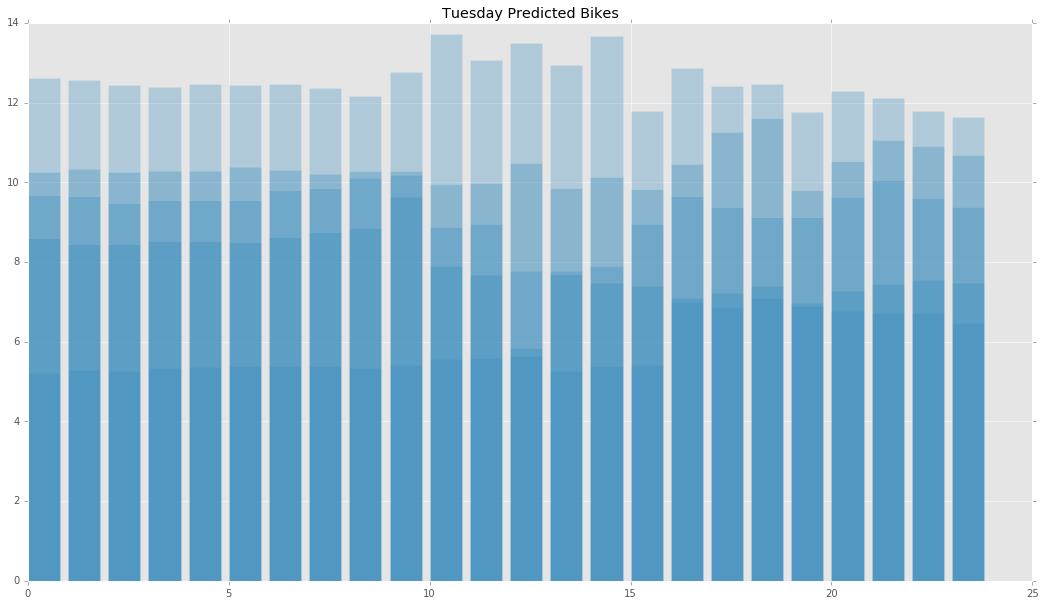

In [103]:
# Day 1 - Multiple stations

rcParams['figure.figsize'] =  18, 10

X = station_seventy_day_one['hour']
ten = station_ten_day_one['bikes_predicted']
thirty = station_thirty_day_one['bikes_predicted']
fifty = station_fifty_day_one['bikes_predicted']
sixty = station_sixty_day_one['bikes_predicted']
seventy = station_seventy_day_one['bikes_predicted']

plt.bar(X, ten, alpha = 0.3)
plt.bar(X, thirty, alpha = 0.3)
plt.bar(X, fifty, alpha = 0.3)
plt.bar(X, sixty,  alpha = 0.3)
plt.bar(X, seventy, alpha = 0.3)

import matplotlib.patches as mpatches

plt.title("Tuesday Predicted Bikes")


In [104]:
# Day 6 - Multiple Stations

In [105]:
station_ten_day_six = merged_df[(merged_df['station_id'] == 10) & (merged_df['day'] == 6)]
station_thirty_day_six = merged_df[(merged_df['station_id'] == 30) & (merged_df['day'] == 6)]
station_fifty_day_six = merged_df[(merged_df['station_id'] == 50) & (merged_df['day'] == 6)]
station_sixty_day_six = merged_df[(merged_df['station_id'] == 60) & (merged_df['day'] == 6)]
station_seventy_day_six = merged_df[(merged_df['station_id'] == 70) & (merged_df['day'] == 6)]

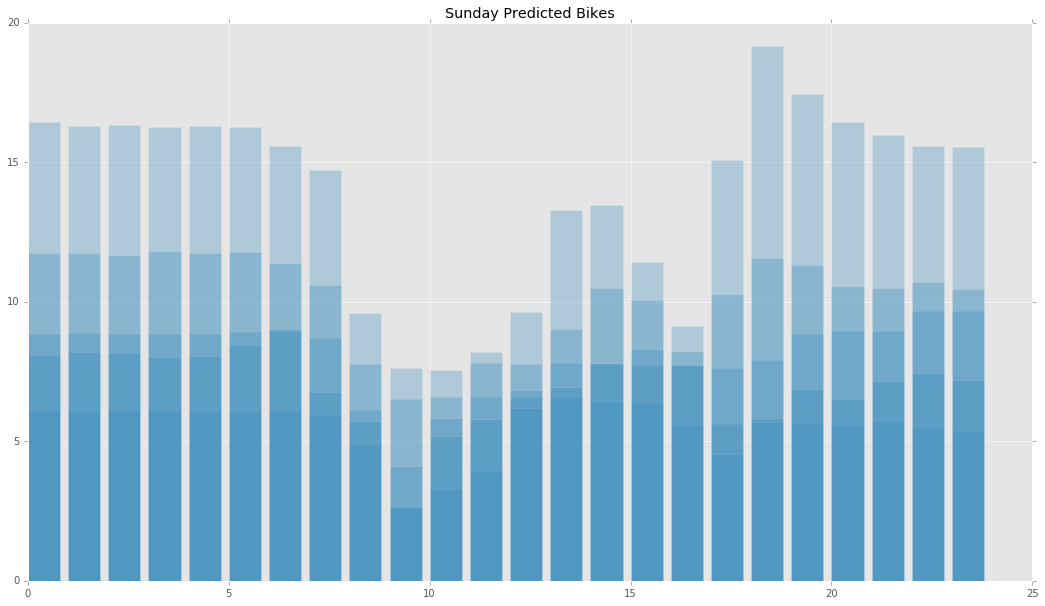

In [106]:
# Day 6 - Multiple stations

rcParams['figure.figsize'] =  18, 10

X = station_seventy_day_six['hour']
ten = station_ten_day_six['bikes_predicted']
thirty = station_thirty_day_six['bikes_predicted']
fifty = station_fifty_day_six['bikes_predicted']
sixty = station_sixty_day_six['bikes_predicted']
seventy = station_seventy_day_six['bikes_predicted']

plt.bar(X, ten, alpha = 0.3)
plt.bar(X, thirty, alpha = 0.3)
plt.bar(X, fifty, alpha = 0.3)
plt.bar(X, sixty,  alpha = 0.3)
plt.bar(X, seventy, alpha = 0.3)

import matplotlib.patches as mpatches

plt.title("Sunday Predicted Bikes")


Given the supply variance across stations and between weeekdays and weekends, I'm motivated to begin by creating two regressions for each station - weekend and weekday. The task now is to do this programatically. 

Sometimes a linear regression seems appropriate, and other times a quadratic regression would be a better fit. How should we determine the number of coeffients. One per hour of the day? Three points (early morning, mid-day, night) to supply enough data to capture the quadratic curves we are witnessing?

## Polynomial regression

In [13]:
station_seventy_day_two = station_seventy.query("day == 2")

## Numpy polyfit

In [165]:
def polynomial_predictions(X, Y):
    z = np.poly1d(np.polyfit(X,Y,2))
    values = []
    for i in range(0,24):
        values.append(z(i))
    return values    

In [166]:
station_seventy_polyfit_values = polynomial_predictions(X, Y)

In [167]:
station_seventy_polyfit_values

[9.7233437826944513,
 9.7143921594836744,
 9.70916118189648,
 9.7076508499328682,
 9.7098611635928407,
 9.7157921228763957,
 9.7254437277835333,
 9.7388159783142552,
 9.7559088744685578,
 9.7767224162464448,
 9.8012566036479143,
 9.8295114366729681,
 9.8614869153216027,
 9.8971830395938216,
 9.9365998094896231,
 9.9797372250090071,
 10.026595286151975,
 10.077173992918526,
 10.13147334530866,
 10.189493343322376,
 10.251233986959676,
 10.316695276220559,
 10.385877211105024,
 10.458779791613072]

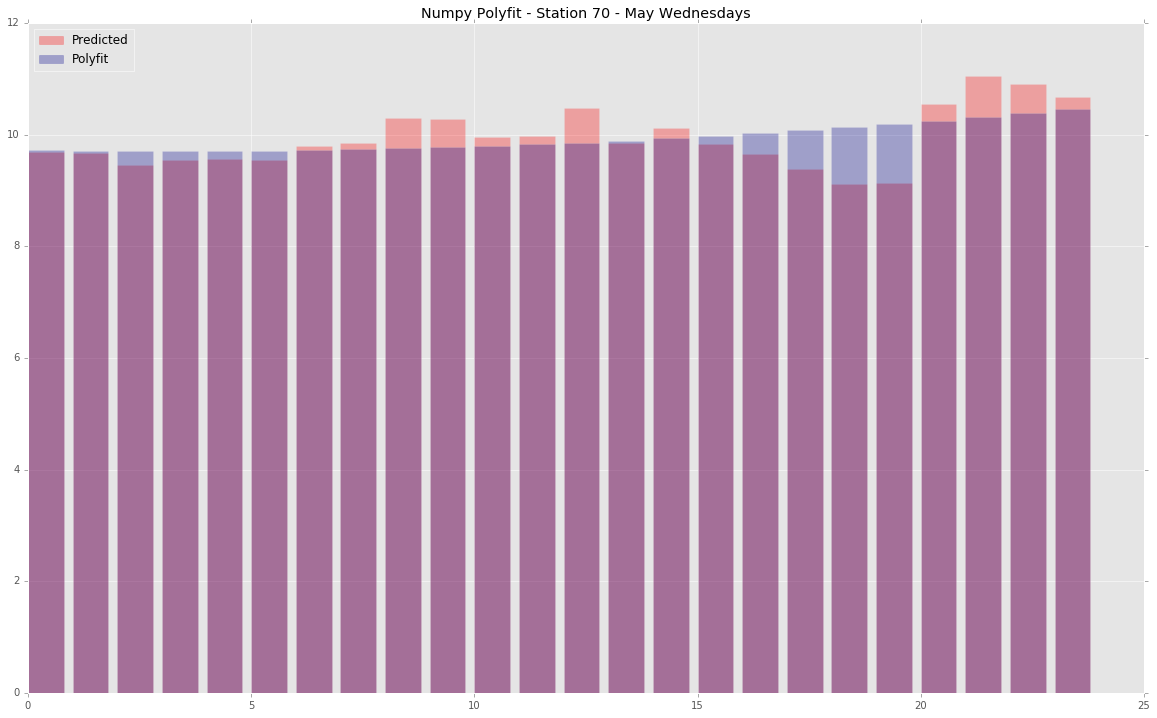

In [176]:
# Day 1 Polyfit

rcParams['figure.figsize'] =  20, 12

X = station_seventy_day_two['hour']
predicted = station_seventy_day_two['bikes_predicted']
polyfit = station_seventy_polyfit_values

plt.bar(X, predicted, color = 'red', alpha = 0.3)
plt.bar(X, polyfit, color = 'darkblue', alpha = 0.3)

import matplotlib.patches as mpatches

plt.title("Numpy Polyfit - Station 70 - May Wednesdays")

predicted = mpatches.Patch(color='red', label='Predicted', alpha = 0.3)
polyfit = mpatches.Patch(color='darkblue', label='Polyfit', alpha = 0.3)
plt.legend(handles=[predicted, polyfit], loc=2)


In [182]:
X = range(0,24)
Y1 = station_seventy_day_six['bikes_predicted']

In [183]:
station_seventy_polyfit_day_six = polynomial_predictions(X, Y1)

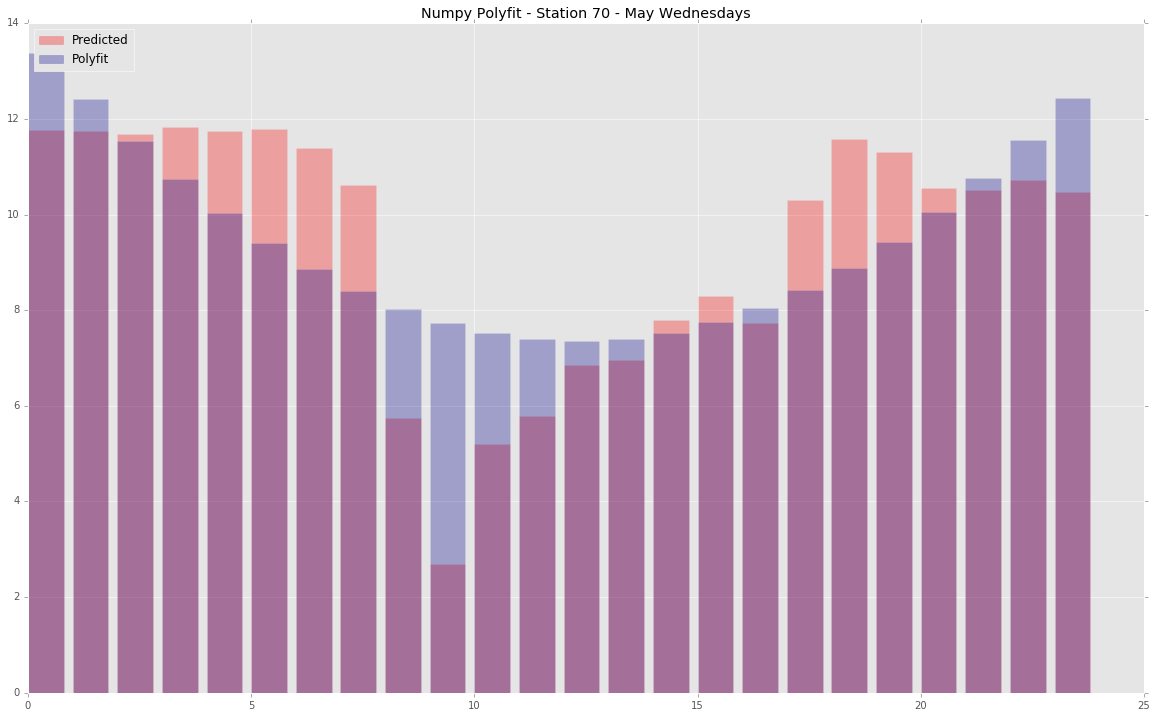

In [186]:
# Day 1 Polyfit

rcParams['figure.figsize'] =  20, 12

predicted = station_seventy_day_six['bikes_predicted']
polyfit = station_seventy_polyfit_day_six

plt.bar(X, predicted, color = 'red', alpha = 0.3)
plt.bar(X, polyfit, color = 'darkblue', alpha = 0.3)

import matplotlib.patches as mpatches

plt.title("Numpy Polyfit - Station 70 - May Wednesdays")

predicted = mpatches.Patch(color='red', label='Predicted', alpha = 0.3)
polyfit1 = mpatches.Patch(color='darkblue', label='Polyfit', alpha = 0.3)
plt.legend(handles=[predicted, polyfit1], loc=2)

This is what we'd expect to see in a curve fitting - a function that reduceds the mean difference between estimations and observed data (some over estimated, some under). 

But will this regression make for better predictions than our historical daily averages?

## Validation - Station 2 (May)

In [372]:
station_two = merged_df[(merged_df['station_id'] == 2)]

In [373]:
means_all_days = station_two.groupby(['weekday', 'hour']).mean()

In [374]:
def polynomial_predictions(Y):
    x = range(0, 24)
    return np.poly1d(np.polyfit(x,Y,2))

def set_polyfit(row):
    row['polyfit'] = predictors[int(row['weekday'])](row['bikes_predicted'])
    return row

In [375]:
predictors = []
for i in range(0,7):
    predictors.append(
        polynomial_predictions(means_all_days.query('weekday == @i')['bikes_predicted'])
    )

station_two = station_two.apply(set_polyfit, axis=1)

In [376]:
from sklearn.metrics import mean_squared_error
y_true = station_two['bikes_actual']
y_pred = station_two['polyfit']
print "STATION 2 (May) POLYFIT - Mean Squared Error:", mean_squared_error(y_true, y_pred)

STATION 2 (May) POLYFIT - Mean Squared Error: 20.3364393939
